In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

### 导入数据

In [29]:
# 导入数据
# 导入xlsx文件，从第二行，第11列开始读取数据
ctg_data = pd.read_excel('train.xlsx', skiprows=1, usecols=range(10, 32))
ctg_test = pd.read_excel('test.xlsx', skiprows=1, usecols=range(10, 32))

### 数据的基本统计分析

In [30]:
# 打印前五行
ctg_data.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,156,0.000000,0.001289,0.005155,0.0,0.0,0.0,53,0.8,3,...,102,193,3,0,161,159,161,3,0,1
1,120,0.012510,0.005838,0.002502,0.0,0.0,0.0,40,1.3,0,...,68,157,5,1,133,134,136,9,1,1
2,121,0.011696,0.008772,0.001462,0.0,0.0,0.0,39,1.3,0,...,102,200,7,1,133,131,132,8,-1,1
3,121,0.011312,0.006787,0.001131,0.0,0.0,0.0,39,1.3,0,...,68,200,8,1,133,132,134,8,0,1
4,121,0.011387,0.005176,0.002070,0.0,0.0,0.0,39,1.2,0,...,68,154,7,1,133,133,135,8,1,1


In [31]:
ctg_data.shape

(1700, 22)

In [32]:
# 打印后五行
ctg_data.tail()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1695,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
1696,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
1697,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
1698,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
1699,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


In [33]:
# (rows, columns)
ctg_data.shape

(1700, 22)

In [34]:
ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        1700 non-null   int64  
 1   AC.1      1700 non-null   float64
 2   FM.1      1700 non-null   float64
 3   UC.1      1700 non-null   float64
 4   DL.1      1700 non-null   float64
 5   DS.1      1700 non-null   float64
 6   DP.1      1700 non-null   float64
 7   ASTV      1700 non-null   int64  
 8   MSTV      1700 non-null   float64
 9   ALTV      1700 non-null   int64  
 10  MLTV      1700 non-null   float64
 11  Width     1700 non-null   int64  
 12  Min       1700 non-null   int64  
 13  Max       1700 non-null   int64  
 14  Nmax      1700 non-null   int64  
 15  Nzeros    1700 non-null   int64  
 16  Mode      1700 non-null   int64  
 17  Mean      1700 non-null   int64  
 18  Median    1700 non-null   int64  
 19  Variance  1700 non-null   int64  
 20  Tendency  1700 non-null   int6

In [35]:
# 检查缺失值
ctg_data.isnull().sum()

LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [36]:
# 生成统计信息
ctg_data.describe()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,132.737059,0.003411,0.007327,0.004829,0.002128,0.000004,0.000181,46.040588,1.379412,7.706471,...,93.287647,163.868235,4.049412,0.333529,136.770588,133.577059,137.425294,20.345294,0.294118,1.251765
std,9.351090,0.003960,0.042092,0.002783,0.003078,0.000070,0.000622,16.875094,0.799109,15.892675,...,28.220922,17.268207,2.845631,0.682709,16.729551,15.925165,14.692523,29.114783,0.614204,0.591406
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002835,0.000000,0.000000,0.000000,31.000000,0.800000,0.000000,...,68.000000,153.000000,2.000000,0.000000,129.000000,124.000000,128.000000,3.000000,0.000000,1.000000
50%,133.000000,0.001958,0.000000,0.004929,0.000000,0.000000,0.000000,47.000000,1.300000,0.000000,...,94.000000,162.000000,4.000000,0.000000,139.000000,135.000000,139.000000,9.000000,0.000000,1.000000
75%,139.000000,0.006029,0.001552,0.006827,0.003759,0.000000,0.000000,60.000000,1.800000,6.250000,...,118.000000,174.000000,6.000000,0.000000,148.000000,145.000000,147.000000,26.000000,1.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.014742,0.001353,0.005348,84.000000,6.300000,91.000000,...,158.000000,238.000000,18.000000,8.000000,186.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### 数据的属性探查

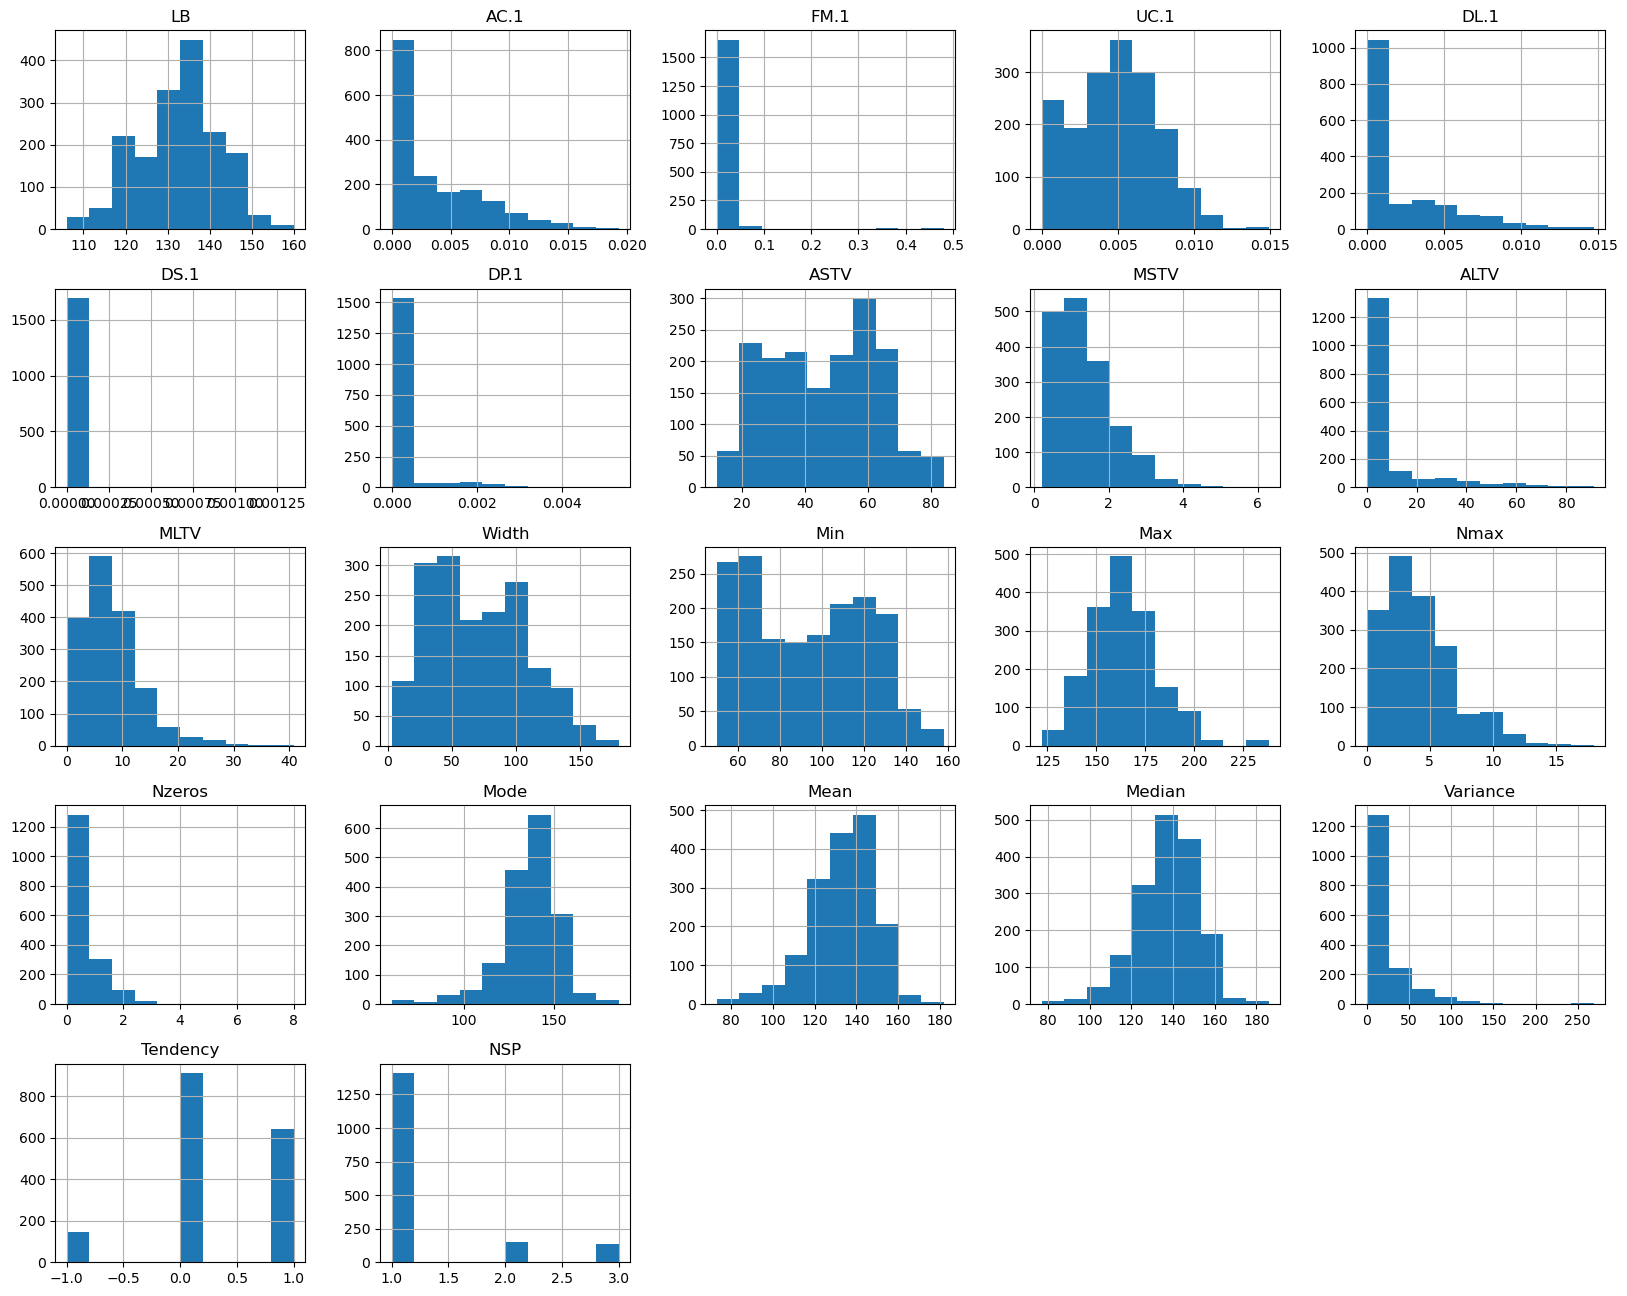

In [37]:
# 全属性分布图
ctg_data.hist(figsize=(20, 16))
plt.show()

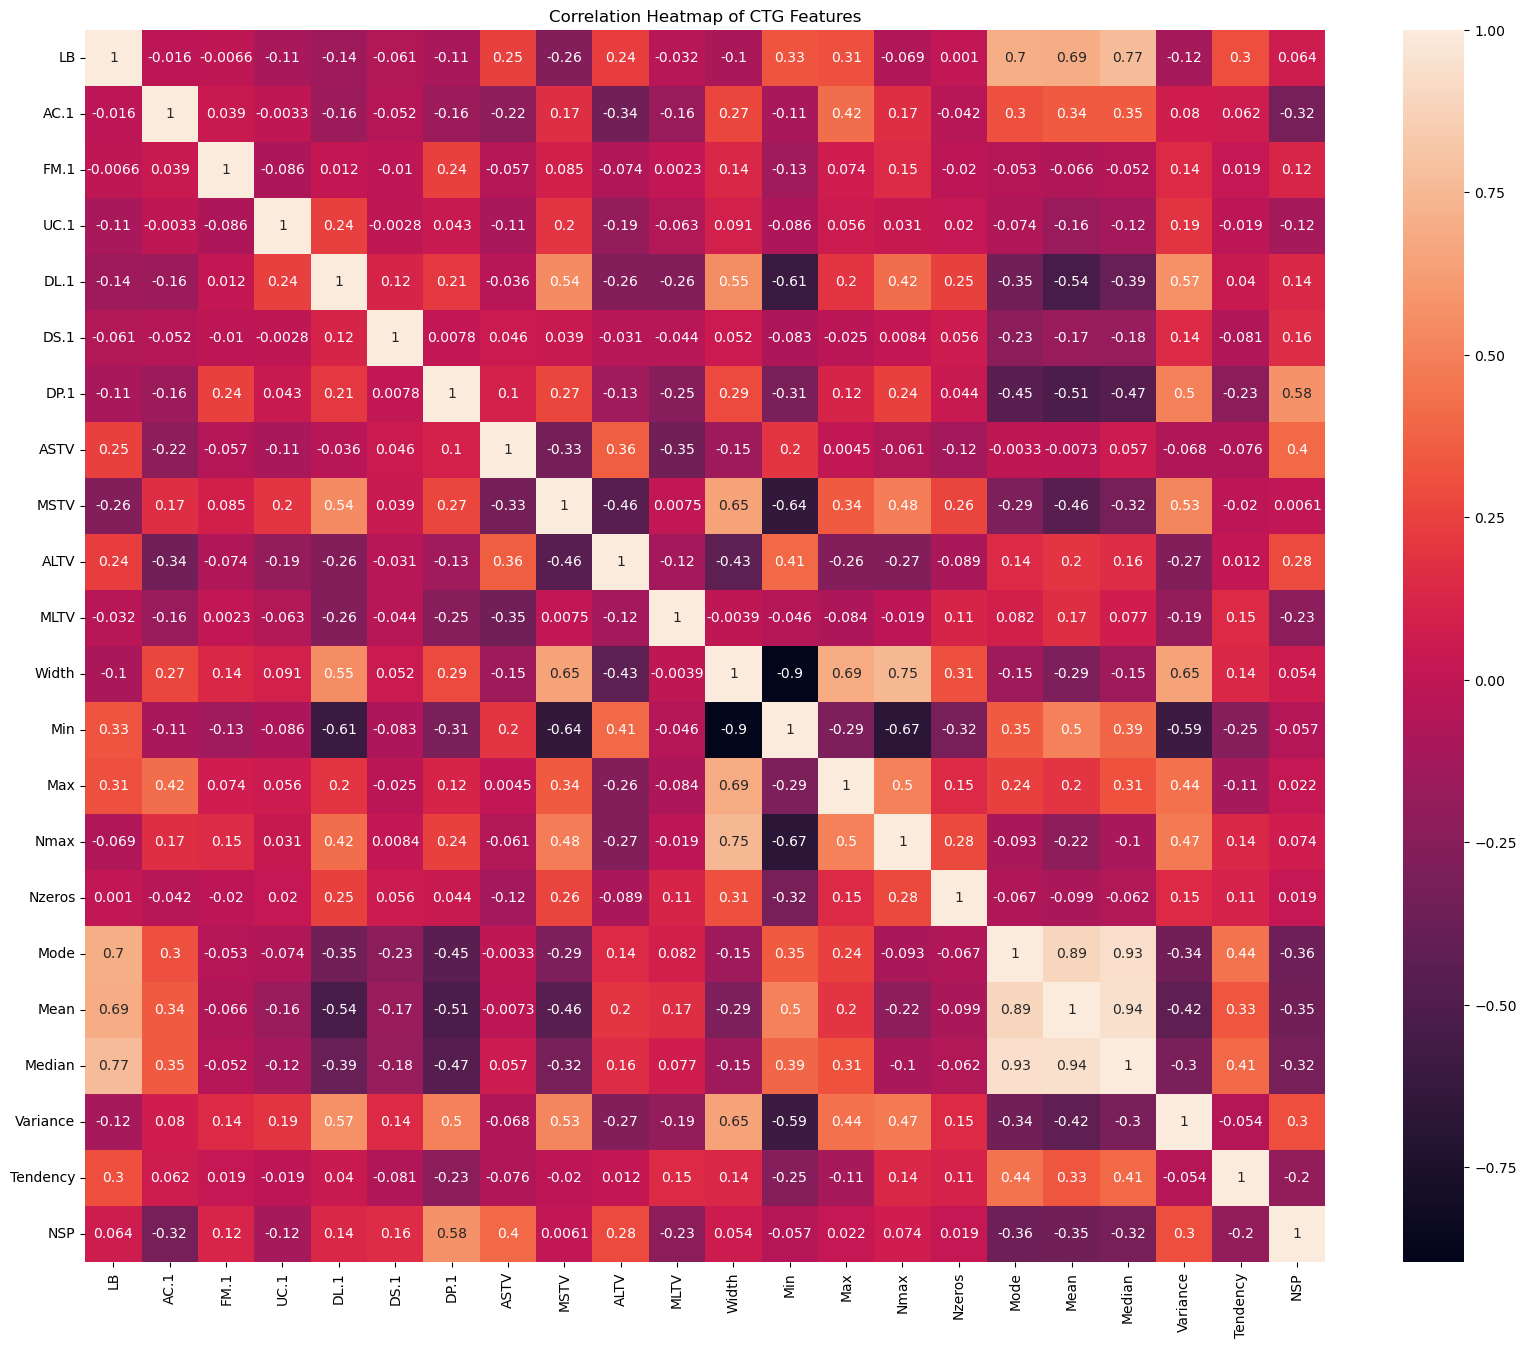

In [38]:
plt.figure(figsize=(20, 16))

# 创建热力图
correlation_matrix = ctg_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of CTG Features')
plt.show()

### 数据预处理

### 数据模型构建

Accuracy: 85.45%
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       246
           2       0.84      0.73      0.78       141
           3       0.95      0.51      0.67        39

    accuracy                           0.85       426
   macro avg       0.88      0.74      0.79       426
weighted avg       0.86      0.85      0.85       426



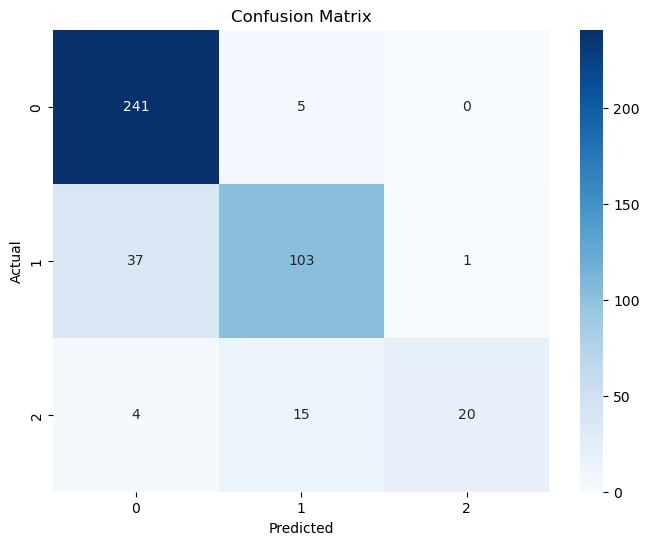

d:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


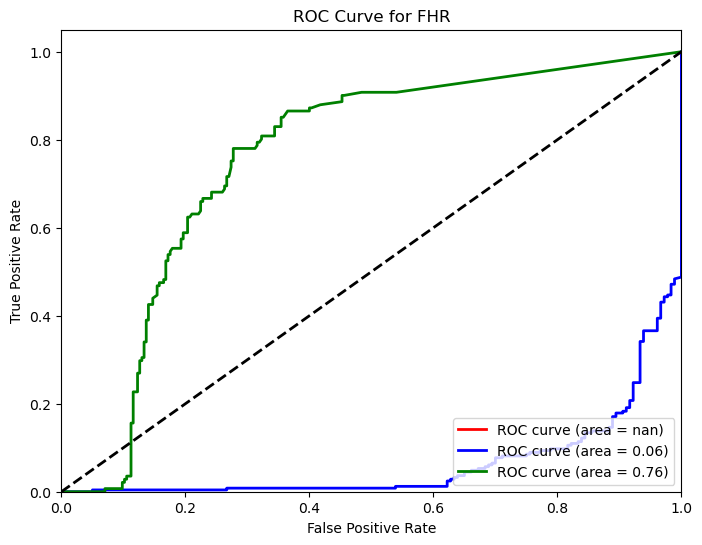

In [39]:
# 随机森林
clf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=50,
)

# 从ctg_data和ctg_test中分离出X和y
X_train = ctg_data.drop("NSP", axis=1)
X_test = ctg_test.drop("NSP", axis=1)
y_train = ctg_data["NSP"]
y_test = ctg_test["NSP"]

# 训练模型
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# 准确率、精确率、召回率、特异性、AUC值和F_1 score
print(classification_report(y_test, y_pred))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 三分类的ROC曲线
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color="red", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
plt.plot(fpr[2], tpr[2], color="green", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve for FHR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estima

d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "d:\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best score: 0.927323971645961
Best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, random_state=42)
Accuracy: 83.80%
              precision    recall  f1-score   support

           1       0.83      0.98      0.90       246
           2       0.82      0.70      0.76       141
           3       1.00      0.46      0.63        39

    accuracy                           0.84       426
   macro avg       0.89      0.71      0.76       426
weighted avg       0.85      0.84      0.83       426



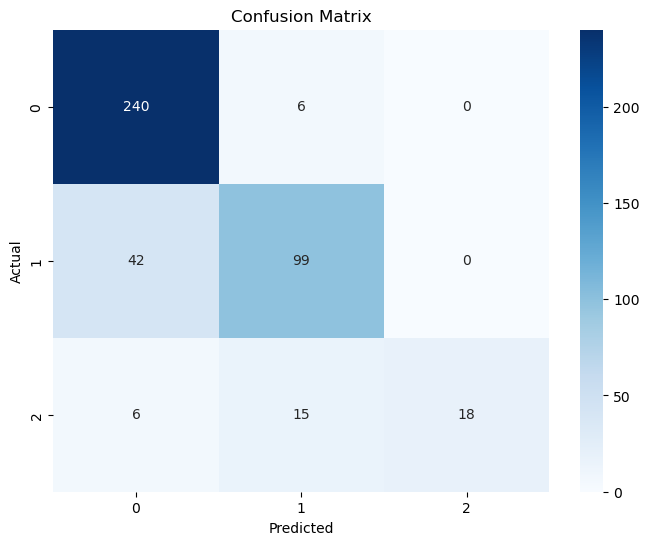

d:\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


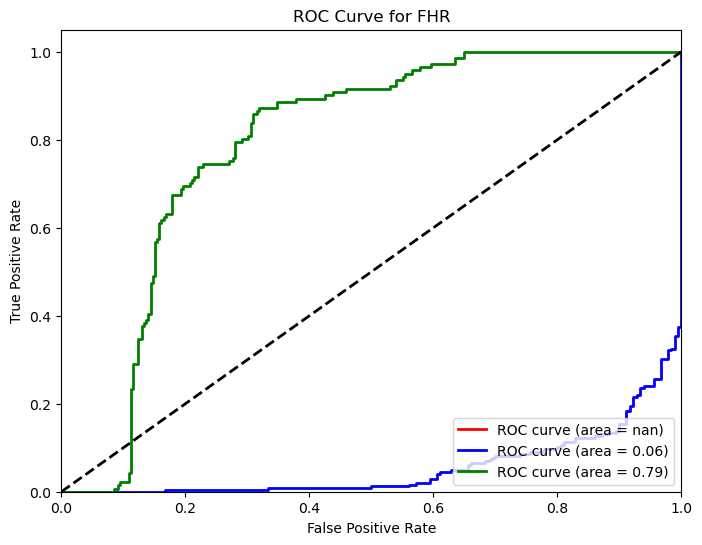

In [40]:
# 使用交叉验证寻找最佳参数
param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [None, 10, 50, 100],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [1, 4],
    "bootstrap": [True, False],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, scoring="roc_auc_ovr", cv=5, verbose=2
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best estimator:", grid_search.best_estimator_)

# 使用最优模型进行预测
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# 准确率、精确率、召回率、特异性、AUC值和F_1 score
print(classification_report(y_test, y_pred))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 三分类的ROC曲线
y_score = grid_search.best_estimator_.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color="red", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[1])
plt.plot(fpr[2], tpr[2], color="green", lw=2, label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC Curve for FHR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()